In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

#### 1.Problem Statement

In [ ]:
To Predict house prices based on real estate features
1.transaction date
2.house age
3.distance to the nearest MRT station
4.number of convenience stores
5.latitude
6.longitude

#### 2.Data Gathering

In [2]:
df = pd.read_excel("Real_estate.xlsx")
df

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.columns.tolist()

['No',
 ' transaction date',
 'house age',
 'distance to the nearest MRT station',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area']

#### 3.Exploratory Data Analysis

##### 1.Missing value

In [4]:
df.isnull().sum()

No                                     0
 transaction date                      0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [ ]:
DataFrame contains no missing values

##### 2.Categorical Data(Object DataType)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1    transaction date                    414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.dtypes

No                                       int64
 transaction date                      float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

In [ ]:
DataFrame has no categorical data(object data type)

#### 4.Feature Engineering

In [ ]:
No need to perform feature engineering as DataFrame contains no missing value and no object data type, but will drop "NO" column as it is of no use

In [7]:
df.drop("No",axis = 1, inplace=True)

In [8]:
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


#### 5.Feature selection

##### 1.Linearity

In [9]:
df.corr()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


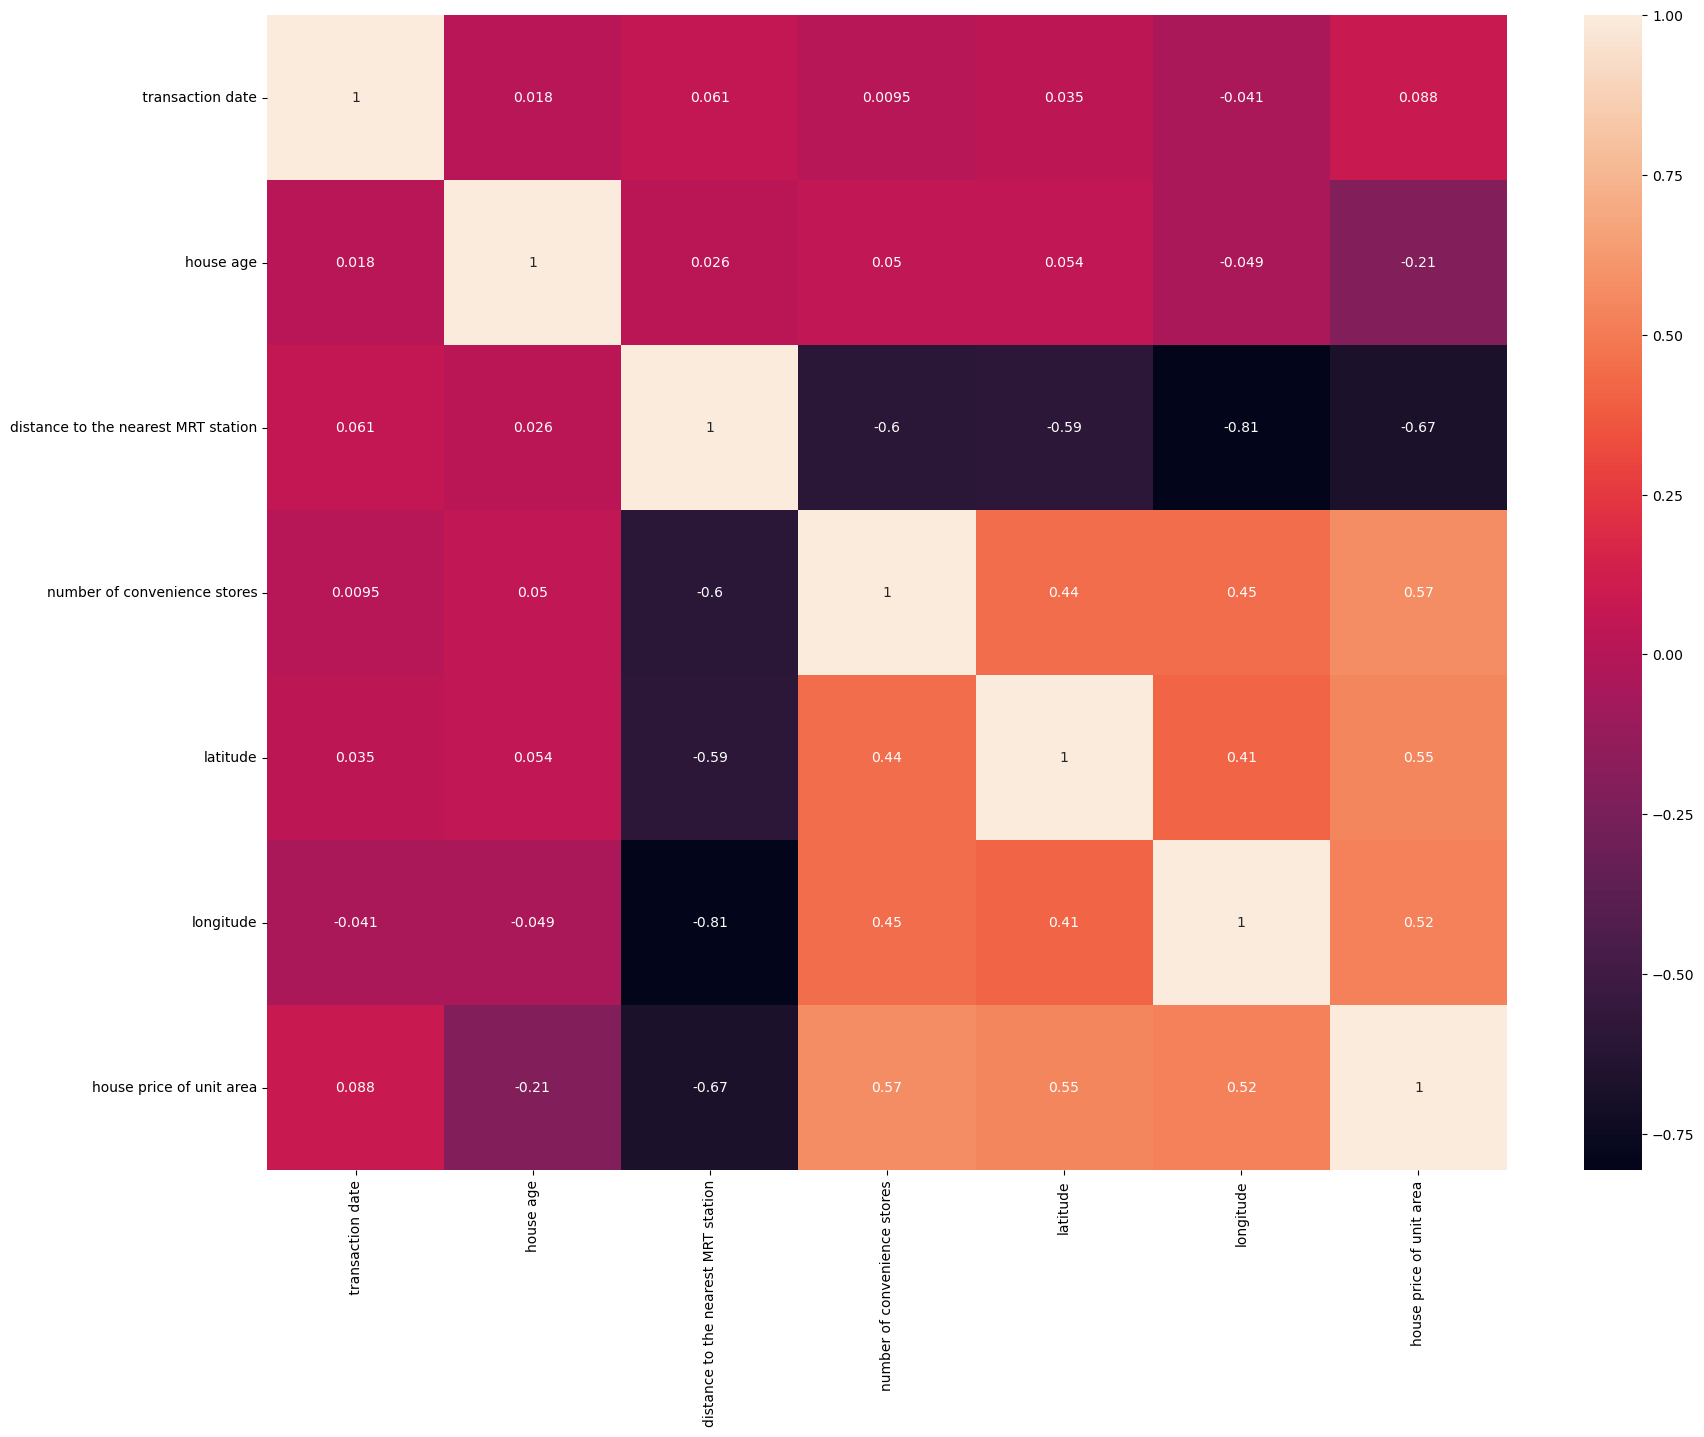

In [10]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.savefig('HPR_corr.png')

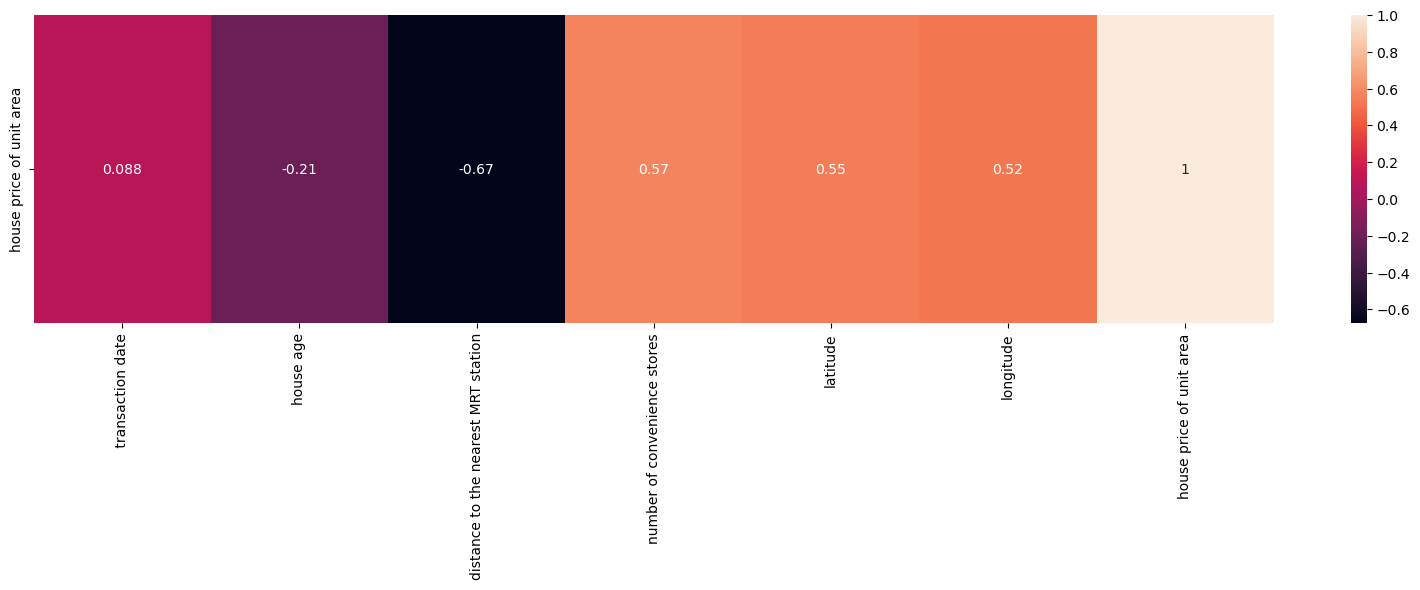

In [11]:
plt.figure(figsize = (20,4))
sns.heatmap(df.corr().tail(1),annot = True)
plt.savefig('HPR_corr.png')

##### 2.No Multicolinearity

In [12]:
x = df.drop("house price of unit area",axis = 1)
y = df["house price of unit area"]

In [13]:
x.columns

Index([' transaction date', 'house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude'],
      dtype='object')

In [14]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list

[42526720.52504183,
 3.471392187504246,
 4.260901945361152,
 4.7480981150989425,
 6178185.230248435,
 41982923.74890924]

In [15]:
vif_values = pd.Series(vif_list,index = x.columns)
vif_values

 transaction date                      4.252672e+07
house age                              3.471392e+00
distance to the nearest MRT station    4.260902e+00
number of convenience stores           4.748098e+00
latitude                               6.178185e+06
longitude                              4.198292e+07
dtype: float64

<Axes: >

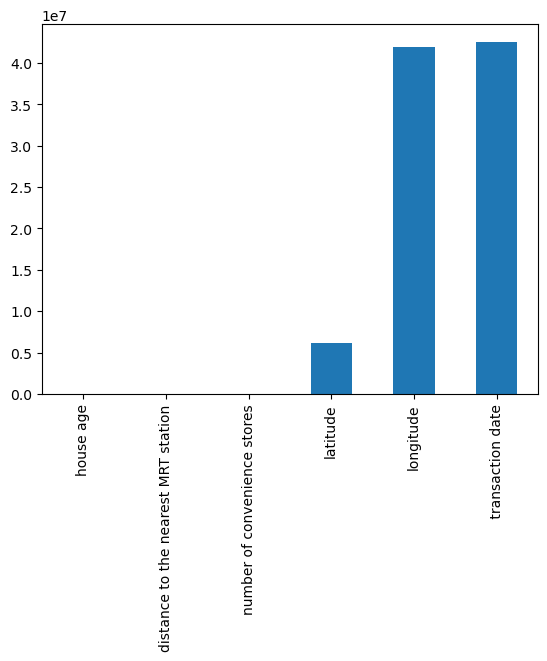

In [16]:
vif_values.sort_values().plot(kind = 'bar')

#### 6 Model Training

In [17]:
x

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [18]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64

#### Data Spilitting

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.6,
                                                random_state = 2)

In [38]:
x_train

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
172,2013.583333,6.6,90.45606,9,24.97433,121.54310
57,2012.916667,3.5,56.47425,7,24.95744,121.53711
244,2013.083333,4.8,1559.82700,3,24.97213,121.51627
240,2013.083333,11.0,1712.63200,2,24.96412,121.51670
345,2012.666667,0.0,185.42960,0,24.97110,121.53170
...,...,...,...,...,...,...
299,2013.166667,33.2,121.72620,10,24.98178,121.54059
22,2012.916667,14.7,1360.13900,1,24.95204,121.54842
72,2013.583333,32.5,424.54420,8,24.97587,121.53913
15,2013.583333,35.7,579.20830,2,24.98240,121.54619


In [39]:
y_train

172    58.1
57     53.5
244    21.7
240    28.8
345    37.9
       ... 
299    46.1
22     24.6
72     36.3
15     50.5
168    37.4
Name: house price of unit area, Length: 248, dtype: float64

In [40]:
x_test

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
147,2012.750000,3.2,489.8821,8,24.97017,121.54494
217,2012.916667,28.0,372.6242,6,24.97838,121.54119
277,2013.416667,21.2,2185.1280,3,24.96322,121.51237
32,2012.750000,37.9,488.5727,1,24.97349,121.53451
182,2013.500000,13.5,2147.3760,3,24.96299,121.51284
...,...,...,...,...,...,...
186,2013.166667,20.9,2185.1280,3,24.96322,121.51237
356,2012.833333,10.3,211.4473,1,24.97417,121.52999
256,2012.666667,14.6,339.2289,1,24.97519,121.53151
126,2013.083333,38.6,804.6897,4,24.97838,121.53477


In [41]:
y_test

147    43.2
217    40.8
277    27.7
32     34.2
182    23.6
       ... 
186    25.7
356    45.3
256    26.5
126    62.9
127    55.0
Name: house price of unit area, Length: 166, dtype: float64

#### Creating Instance of linear Regression

In [42]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [93]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [94]:
linear_reg.coef_

array([ 6.82746565e+00, -3.70163344e-01, -3.63637238e-03,  1.33218276e+00,
        2.31807909e+02,  1.54421840e+01])

In [95]:
np.around(linear_reg.coef_,2)

array([  6.83,  -0.37,  -0.  ,   1.33, 231.81,  15.44])

In [96]:
linear_reg.intercept_

-21367.002366543704

In [97]:
np.around(linear_reg.intercept_,1)

-21367.0

#### 7.Model Evaluation

##### 1.Testing Data Evaluation

In [98]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_test,y_pred)
print(" R_Square value is :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 104.61870829520505
Root Mean Squared Error is : 10.228328714663263
 Mean absolute Error is : 6.75373777875869
 R_Square value is : 0.5134689828483973
Adjusted R_Square value is : 0.4951093218238085


##### 2.Training Data Evaluation

In [99]:
y_pred_train  = linear_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_train,y_pred_train)
print(" R_Square value is :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 62.34850273557723
Root Mean Squared Error is : 7.89610680877464
 Mean absolute Error is : 5.703269636997539
 R_Square value is : 0.6201879094642159
Adjusted R_Square value is : 0.6107320067952752


In [100]:
r_squared_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i],y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i],y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    adj_r2 = 1-((1-r2_value)*(n-1))/(n-k-1)
    adj_r2_list.append(adj_r2)

In [101]:
r_squared_list

[0.008856689735516121,
 0.08842482088120007,
 0.5214440234698013,
 0.594273752619073,
 0.6200742071519695,
 0.6201879094642159]

In [102]:
adj_r2_list

[0.004827651888912432,
 0.08098339084757722,
 0.5155601385124629,
 0.5875951312630083,
 0.6122245006881673,
 0.6107320067952752]

In [103]:
new_x_train = x_train.copy()
new_x_train['TARGET'] = y_train
new_x_train.corr()['TARGET']

 transaction date                      0.094110
house age                             -0.274827
distance to the nearest MRT station   -0.667155
number of convenience stores           0.556349
latitude                               0.538165
longitude                              0.500678
TARGET                                 1.000000
Name: TARGET, dtype: float64

In [104]:
r2_data = {'Correlation':new_x_train.corr()['TARGET'],
           'R_Squared':r_squared_list,
       'Adj R_Squared':adj_r2_list
           }
r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R_Squared,Adj R_Squared
transaction date,0.094110,0.008857,0.004828
house age,-0.274827,0.088425,0.080983
distance to the nearest MRT station,-0.667155,0.521444,0.515560
number of convenience stores,0.556349,0.594274,0.587595
latitude,0.538165,0.620074,0.612225
longitude,0.500678,0.620188,0.610732


#### Assumptions

##### 1.Normality of Residual

In [105]:
residual = y_train - y_pred_train
residual

172     2.075563
57      7.428229
244   -17.316431
240    -4.183438
345    -1.049221
         ...    
299    -0.139997
22     -3.515123
72     -7.885833
15     14.431475
168     2.062822
Name: house price of unit area, Length: 248, dtype: float64

#### Checking Normality of residual

##### 1.kdeplot

<Axes: xlabel='house price of unit area', ylabel='Density'>

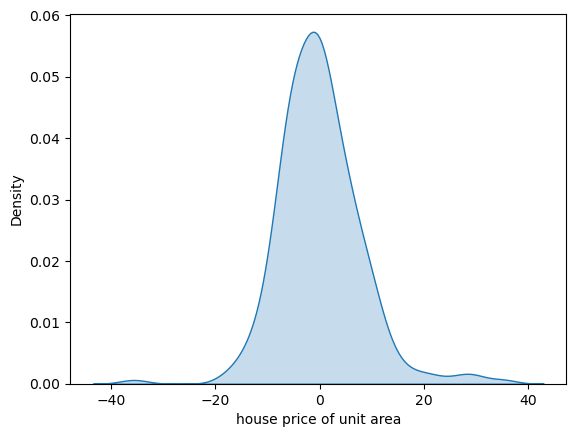

In [106]:
sns.kdeplot(residual,fill = True)

##### 2.Histplot

<Axes: xlabel='house price of unit area', ylabel='Count'>

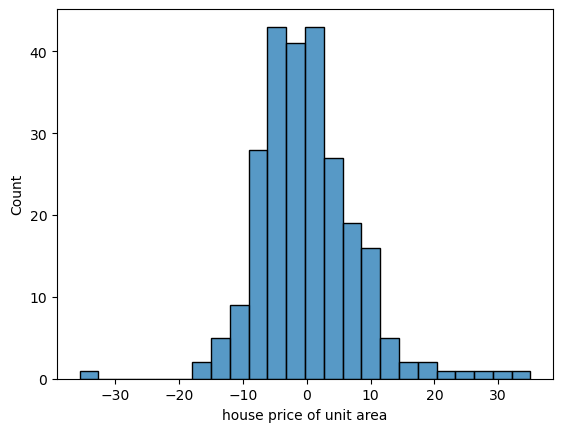

In [107]:
sns.histplot(residual)

<Axes: xlabel='house price of unit area', ylabel='Count'>

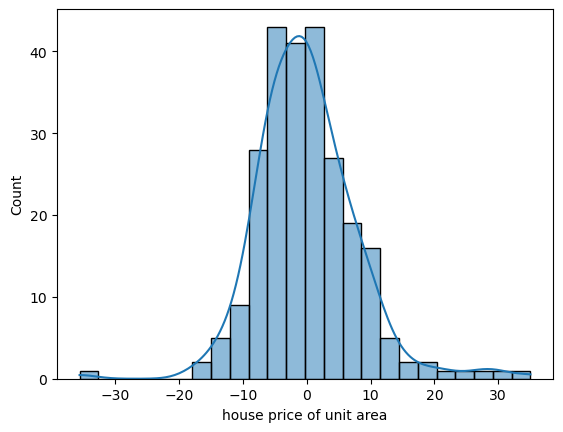

In [108]:
sns.histplot(residual,kde = True)

##### 3.Distplot

<Axes: xlabel='house price of unit area', ylabel='Density'>

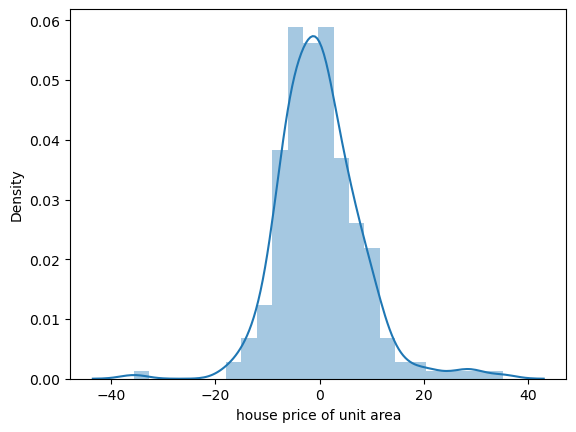

In [109]:
sns.distplot(residual)

#### 2.QQ Plot

In [110]:
import statsmodels.api as sm

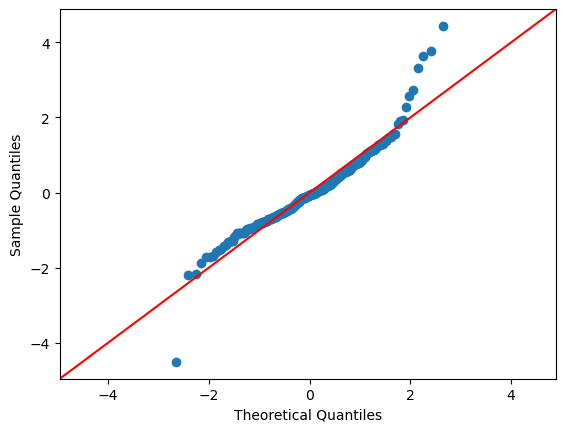

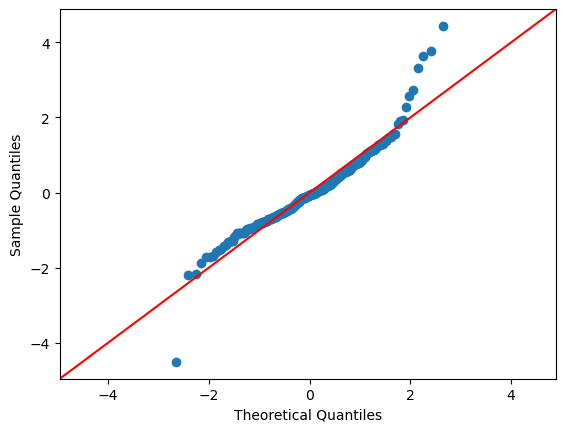

In [111]:
sm.qqplot(residual,line = "45",fit = True)

#### 3.Hypothesis testing

##### 1.shapiro testing

In [112]:
from scipy.stats import shapiro

In [113]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

0.9394744038581848
1.3842344159797904e-08


In [114]:
_,p_val = shapiro(residual)
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 1.3842344159797904e-08
Data is not normally distributed
Alternate hypothesis is true


##### 2.ks test

In [115]:
from scipy.stats import kstest

In [116]:
residual = y_train - y_pred_train
residual

172     2.075563
57      7.428229
244   -17.316431
240    -4.183438
345    -1.049221
         ...    
299    -0.139997
22     -3.515123
72     -7.885833
15     14.431475
168     2.062822
Name: house price of unit area, Length: 248, dtype: float64

In [117]:
_,p_val = kstest(residual,'norm')
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 9.534872366291775e-34
Data is not normally distributed
Alternate hypothesis is true


##### 3.Normal test

In [118]:
from scipy.stats import normaltest

In [119]:
_, p_val = normaltest(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 3.6105750759828395e-10
Data is not normally distributed
Alternate Hypothesis is True


#### 4.Skewness

In [120]:
from scipy.stats import skew

Mean     : -1.1149504258913023e-12
Median   : -0.5662134581929408
Skewness : 0.6501285536172272
Skewness : 0.6461896991862819


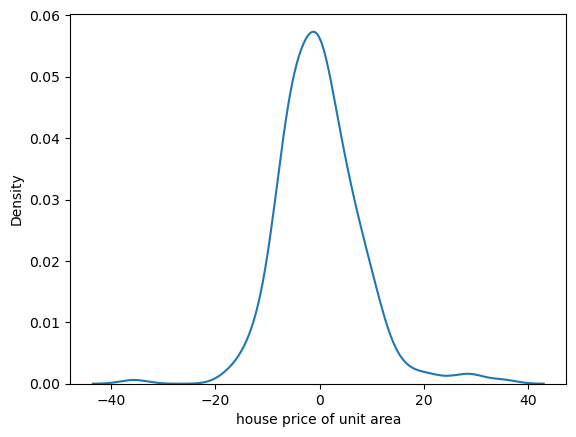

In [121]:
sns.kdeplot(residual)
s1 = residual
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

#### 4 .Homoscedascticity

In [122]:
y_train

172    58.1
57     53.5
244    21.7
240    28.8
345    37.9
       ... 
299    46.1
22     24.6
72     36.3
15     50.5
168    37.4
Name: house price of unit area, Length: 248, dtype: float64

In [123]:
y_pred_train
residual_train = y_train-y_pred_train
residual

172     2.075563
57      7.428229
244   -17.316431
240    -4.183438
345    -1.049221
         ...    
299    -0.139997
22     -3.515123
72     -7.885833
15     14.431475
168     2.062822
Name: house price of unit area, Length: 248, dtype: float64

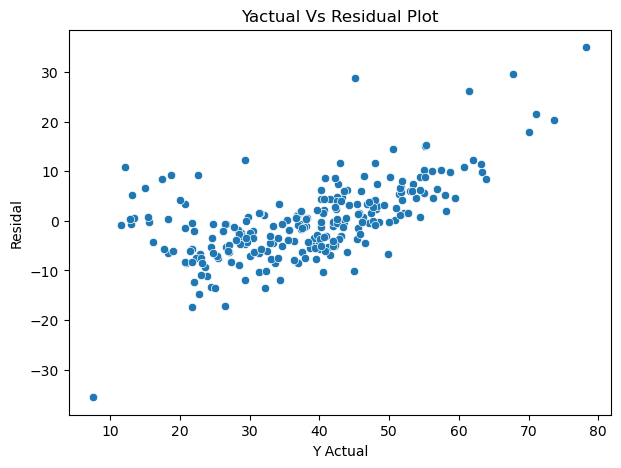

In [124]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

#### Single Row Testing

In [125]:
x_test

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
147,2012.750000,3.2,489.8821,8,24.97017,121.54494
217,2012.916667,28.0,372.6242,6,24.97838,121.54119
277,2013.416667,21.2,2185.1280,3,24.96322,121.51237
32,2012.750000,37.9,488.5727,1,24.97349,121.53451
182,2013.500000,13.5,2147.3760,3,24.96299,121.51284
...,...,...,...,...,...,...
186,2013.166667,20.9,2185.1280,3,24.96322,121.51237
356,2012.833333,10.3,211.4473,1,24.97417,121.52999
256,2012.666667,14.6,339.2289,1,24.97519,121.53151
126,2013.083333,38.6,804.6897,4,24.97838,121.53477


In [126]:
x_test[10:11]

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
412,2013.0,8.1,104.8101,5,24.96674,121.54067


In [127]:
linear_reg.predict(x_test[10:11])[0]

44.308629688730434

In [128]:
column_names = x.columns.tolist()
column_names

[' transaction date',
 'house age',
 'distance to the nearest MRT station',
 'number of convenience stores',
 'latitude',
 'longitude']

In [129]:
len(x.columns)

6

In [130]:
linear_reg.n_features_in_

6

In [131]:
transaction_date =2013.0
house_age = 8.1
distance_to_the_nearest_MRT_station = 104.8101
number_of_convenience_stores = 5
latitude = 24.96674
longitude = 121.54067


test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = transaction_date
test_array[0,1] = house_age
test_array[0,2] = distance_to_the_nearest_MRT_station
test_array[0,3] = number_of_convenience_stores
test_array[0,4] = latitude
test_array[0,5] = longitude

predicted_house_price = np.around(linear_reg.predict(test_array)[0],1)
predicted_house_price

44.3

In [132]:
with open("linear_regression.pkl","wb") as f:
    pickle.dump(linear_reg,f)